Akash Taploo, Devaansh Piplani and Dylan Kotmel

Prof: Mehdi Khorram

FINC 761: Stock Market Algorithmic Trading

Final Project Code File

STEP-1:Finding a predictor

1) Find a predictor (X) for future stock returns from Finance and Investment academic literature
(for example, Banz (1981) paper, shows that size of the company, calculated as log of
monthly market value of equity, predicts future stock returns).

After doing some research, we found that The MACD (Moving Average Convergence Divergence) indicator is used as a predictor for future stock returns in finance and investment academic literature.For example "Predicting Stock Price Trend Using MACD Optimized by Historical Volatility" by Jian Wang and Junseok Kim, published in the Mathematical Problems in Engineering, vol. 2018. Studies have shown that when the MACD line crosses above the signal line, it can indicate a bullish trend and a potential rise in stock prices. Conversely, when the MACD line crosses below the signal line, it can indicate a bearish trend and a potential fall in stock prices.

2)  Explain the economic and intuition behind the prediction relation between X and stock
returns.

The intuition behind using the Moving Average Convergence Divergence (MACD) indicator as a predictor for future stock returns is based on the idea of trend-following. The MACD is a technical analysis tool that is used to identify potential trend changes in a stock's price. The MACD line is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA, while the signal line is a 9-period EMA of the MACD line. When the MACD line crosses above the signal line, it is considered a bullish signal, indicating a potential uptrend, while a cross below the signal line is a bearish signal, indicating a potential downtrend.

The economic reasoning behind using the MACD as a predictor for future stock returns is that trends tend to persist in financial markets. This can be attributed to the phenomenon of momentum, where the price of an asset tends to continue moving in the same direction as its recent past. Therefore, when a stock's price exhibits a trend, it is likely to continue in that direction for a certain period. The MACD helps to identify these trends and provides a signal to buy or sell based on the direction of the trend.

3) Gather the data that you need for calculating X.

To gather the data needed to calculate MACD, we can use the yfinance library in Python. We specify the stock symbol as AAPL whoch is the stock symbol for Apple Inc. and set the period to Max.

In [ ]:
import pandas as pd
import yfinance as yf

# Download stock data from Yahoo Finance
stock = yf.Ticker("AAPL")
df = stock.history(period="max")

4) Compute X.

Once we have the historical price data, we can calculate the MACD indicator using the 12-day and 26-day EMAs. We can also calculate the signal line, which is a 9-day EMA of the MACD line.

In [ ]:
# Calculate the MACD indicator
ema_12 = df["Close"].ewm(span=12, adjust=False).mean()
ema_26 = df["Close"].ewm(span=26, adjust=False).mean()
macd = ema_12 - ema_26
signal = macd.ewm(span=9, adjust=False).mean()
hist = macd - signal

# Add MACD indicator values to the dataframe
df["MACD"] = macd
df["Signal"] = signal
df["Hist"] = hist

# Print the last 5 rows of the dataframe with MACD indicator values
print(df.tail())


                                 Open        High         Low       Close  \
Date                                                                        
2023-04-26 00:00:00-04:00  163.059998  165.279999  162.800003  163.759995   
2023-04-27 00:00:00-04:00  165.190002  168.559998  165.190002  168.410004   
2023-04-28 00:00:00-04:00  168.490005  169.850006  167.880005  169.679993   
2023-05-01 00:00:00-04:00  169.279999  170.449997  168.639999  169.589996   
2023-05-02 00:00:00-04:00  170.089996  170.350006  167.539993  168.539993   

                             Volume  Dividends  Stock Splits      MACD  \
Date                                                                     
2023-04-26 00:00:00-04:00  45498800        0.0           0.0  2.215947   
2023-04-27 00:00:00-04:00  64902300        0.0           0.0  2.367174   
2023-04-28 00:00:00-04:00  55209200        0.0           0.0  2.559990   
2023-05-01 00:00:00-04:00  52472900        0.0           0.0  2.674703   
2023-05-02 00:00

1. Calculate monthly returns for all stocks listed in S&P 100 (or S&P500) index from 01/01/2000 to 12/31/2022.

In [ ]:
#Source: https://wire.insiderfinance.io/how-to-get-all-stocks-from-the-s-p500-in-python-fbe5f9cb2b61

#install/import necessary libraries
#!pip install beautifulsoup4
#!pip install requests
#!pip install yfinance
#!pip install datetime

import bs4 as bs
import requests
import yfinance as yf
import datetime

#obtain current top 100 stocks in S&P
resp = requests.get('https://en.wikipedia.org/wiki/S%26P_100')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

#obtain price information from yfinance for the top 100 stocks
tickers = []

for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]

#for assignment, go from 12/1/1998 to 12/31/2022 to ensure enough data for target period MACD
start = datetime.datetime(1999, 11, 1)
#assignment end date, hashtag if trading
end = datetime.datetime(2022, 12, 31)

#to trade using API get most recent data available by changing end date
#end = datetime.date.today()
data = yf.download(tickers, start=start, end=end, interval='1mo')

df = data.stack().reset_index().rename(index=str, columns={"level_1": "Symbol"}).sort_values(['Symbol','Date'])
df.set_index('Date', inplace=True)

df.to_csv('sp100_stocks.csv')
print(df.tail())

[*********************100%***********************]  101 of 101 completed

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted
           Symbol   Adj Close       Close        High         Low        Open  \
Date                                                                            
2022-08-01    XOM   93.196983   95.589996  101.559998   86.279999   94.790001   
2022-09-01    XOM   85.951355   87.309998   99.190002   83.889999   94.419998   
2022-10-01    XOM  109.085670  110.809998  112.910004   89.720001   90.040001   
2022-11-01    XOM  109.607430  111.339996  114.660004  107.480003  112.370003   
2022-12-01    XOM  109.457741  110.300003  112.070000  102.370003  111.639999   

                 Volume  
Date                     
2022-08-01  424555300.0  
2022-09-01  411406700.0  
2022-10-01  431618500.0  
2022-11-01  368035500.0  
2022-12-01  376504300.0  


In [ ]:
#Source: https://stackoverflow.com/questions/19790790/splitting-dataframe-into-multiple-dataframes
import pandas as pd
UniqueStocks = df.Symbol.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame() for elem in UniqueStocks}

for key in DataFrameDict.keys():
  DataFrameDict[key] = df[:][df.Symbol == key]

DataFrameDict['AAPL']

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
1999-11-01,AAPL,0.743779,0.873884,0.926339,0.690290,0.714286,8.624930e+09
1999-12-01,AAPL,0.781300,0.917969,1.053571,0.813058,0.901786,9.418214e+09
2000-01-01,AAPL,0.788424,0.926339,1.084821,0.772321,0.936384,1.255518e+10
2000-02-01,AAPL,0.871067,1.023438,1.070871,0.866071,0.928571,7.319782e+09
2000-03-01,AAPL,1.032076,1.212612,1.342634,1.017857,1.058594,8.698357e+09
...,...,...,...,...,...,...,...
2022-08-01,AAPL,156.502945,157.220001,176.149994,157.139999,161.009995,1.510240e+09
2022-09-01,AAPL,137.760773,138.199997,164.259995,138.000000,156.639999,2.084723e+09
2022-10-01,AAPL,152.852676,153.339996,157.500000,134.369995,138.210007,1.868140e+09


In [ ]:
#for all stocks in dictionary, calculate monthly returns
for key in DataFrameDict:
  DataFrameDict[key]["Adj_Close_lag"]= DataFrameDict[key]["Adj Close"].shift(1)
  DataFrameDict[key]["ret"]= (DataFrameDict[key]["Adj Close"]-DataFrameDict[key]["Adj_Close_lag"])/DataFrameDict[key]["Adj_Close_lag"]
  DataFrameDict[key]=DataFrameDict[key].dropna(axis=0)

DataFrameDict['AAPL']

,Symbol,Adj Close,Close,High,Low,Open,Volume,Adj_Close_lag,ret
Date,,,,,,,,,
1999-12-01,AAPL,0.781300,0.917969,1.053571,0.813058,0.901786,9.418214e+09,0.743779,0.050447
2000-01-01,AAPL,0.788424,0.926339,1.084821,0.772321,0.936384,1.255518e+10,0.781300,0.009118
2000-02-01,AAPL,0.871067,1.023438,1.070871,0.866071,0.928571,7.319782e+09,0.788424,0.104820
2000-03-01,AAPL,1.032076,1.212612,1.342634,1.017857,1.058594,8.698357e+09,0.871067,0.184842
2000-04-01,AAPL,0.942784,1.107701,1.245536,0.936384,1.209821,8.662405e+09,1.032076,-0.086517
...,...,...,...,...,...,...,...,...,...
2022-08-01,AAPL,156.502945,157.220001,176.149994,157.139999,161.009995,1.510240e+09,161.768829,-0.032552
2022-09-01,AAPL,137.760773,138.199997,164.259995,138.000000,156.639999,2.084723e+09,156.502945,-0.119756
2022-10-01,AAPL,152.852676,153.339996,157.500000,134.369995,138.210007,1.868140e+09,137.760773,0.109552


2. Download monthly risk-free rates from Kenneth French website.

In [ ]:
#obtain risk free rates from Kenneth French
#CAN SKIP THIS BLOCK IF /content/F-F_Research_Data_Factors.csv HAS ALREADY BEEN UPLOADED & CLEANED
import requests, zipfile, io
url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip'
response = requests.get(url, stream=True)
zipfile = zipfile.ZipFile(io.BytesIO(response.content))
zipfile.extractall()
# clean the rf data manually - add date, delete the headers and annualy risk free rates at the end
rf = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows=10)

In [ ]:
#merge rf with df sample & put the dates in common format
rf = pd.read_csv('/content/F-F_Research_Data_Factors.csv')

rf.index = pd.to_datetime(rf['date'], format='%Y%m', errors='coerce').dropna()
rf.index = rf.index.strftime('%Y-%m')
for key in DataFrameDict:
  DataFrameDict[key].index = DataFrameDict[key].index.strftime('%Y-%m')
  DataFrameDict[key]= DataFrameDict[key].join(rf)

DataFrameDict['AAPL']

,Symbol,Adj Close,Close,High,Low,Open,Volume,Adj_Close_lag,ret,date,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,,,
1999-12,AAPL,0.781300,0.917969,1.053571,0.813058,0.901786,9.418214e+09,0.743779,0.050447,199912,7.72,7.02,-8.32,0.44
2000-01,AAPL,0.788424,0.926339,1.084821,0.772321,0.936384,1.255518e+10,0.781300,0.009118,200001,-4.74,5.79,-1.91,0.41
2000-02,AAPL,0.871067,1.023438,1.070871,0.866071,0.928571,7.319782e+09,0.788424,0.104820,200002,2.45,21.42,-9.70,0.43
2000-03,AAPL,1.032076,1.212612,1.342634,1.017857,1.058594,8.698357e+09,0.871067,0.184842,200003,5.20,-17.23,8.17,0.47
2000-04,AAPL,0.942784,1.107701,1.245536,0.936384,1.209821,8.662405e+09,1.032076,-0.086517,200004,-6.40,-6.68,7.26,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08,AAPL,156.502945,157.220001,176.149994,157.139999,161.009995,1.510240e+09,161.768829,-0.032552,202208,-3.77,1.37,0.30,0.19
2022-09,AAPL,137.760773,138.199997,164.259995,138.000000,156.639999,2.084723e+09,156.502945,-0.119756,202209,-9.35,-0.79,0.06,0.19
2022-10,AAPL,152.852676,153.339996,157.500000,134.369995,138.210007,1.868140e+09,137.760773,0.109552,202210,7.83,0.09,8.05,0.23


3. Compute monthly excess returns on all stocks (excess returns is the difference between stock returns and the risk-free rates).

In [ ]:
#calculate excess returns for each stock - RF is in %
for key in DataFrameDict:
  DataFrameDict[key]["exret"]= DataFrameDict[key]["ret"]- (DataFrameDict[key]["RF"]/100)
  DataFrameDict[key].index = pd.to_datetime(DataFrameDict[key].index, format='%Y-%m')

DataFrameDict['AAPL']

,Symbol,Adj Close,Close,High,Low,Open,Volume,Adj_Close_lag,ret,date,Mkt-RF,SMB,HML,RF,exret
Date,,,,,,,,,,,,,,,
1999-12-01,AAPL,0.781300,0.917969,1.053571,0.813058,0.901786,9.418214e+09,0.743779,0.050447,199912,7.72,7.02,-8.32,0.44,0.046047
2000-01-01,AAPL,0.788424,0.926339,1.084821,0.772321,0.936384,1.255518e+10,0.781300,0.009118,200001,-4.74,5.79,-1.91,0.41,0.005018
2000-02-01,AAPL,0.871067,1.023438,1.070871,0.866071,0.928571,7.319782e+09,0.788424,0.104820,200002,2.45,21.42,-9.70,0.43,0.100520
2000-03-01,AAPL,1.032076,1.212612,1.342634,1.017857,1.058594,8.698357e+09,0.871067,0.184842,200003,5.20,-17.23,8.17,0.47,0.180142
2000-04-01,AAPL,0.942784,1.107701,1.245536,0.936384,1.209821,8.662405e+09,1.032076,-0.086517,200004,-6.40,-6.68,7.26,0.46,-0.091117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,AAPL,156.502945,157.220001,176.149994,157.139999,161.009995,1.510240e+09,161.768829,-0.032552,202208,-3.77,1.37,0.30,0.19,-0.034452
2022-09-01,AAPL,137.760773,138.199997,164.259995,138.000000,156.639999,2.084723e+09,156.502945,-0.119756,202209,-9.35,-0.79,0.06,0.19,-0.121656
2022-10-01,AAPL,152.852676,153.339996,157.500000,134.369995,138.210007,1.868140e+09,137.760773,0.109552,202210,7.83,0.09,8.05,0.23,0.107252


4. Add lag of X to the return data.

In [ ]:
#calculate lag of MACD for each stock to be used as a predictor in backtesting
for key in DataFrameDict:
  ema_12 = DataFrameDict[key]["Close"].ewm(span=12, adjust=False).mean()
  ema_26 = DataFrameDict[key]["Close"].ewm(span=26, adjust=False).mean()
  macd = ema_12 - ema_26
  signal = macd.ewm(span=9, adjust=False).mean()
  hist = macd - signal

  #DataFrameDict[key]["MACD"] = macd
  #DataFrameDict[key]["Signal"] = signal
  #DataFrameDict[key]["Hist"] = hist

  DataFrameDict[key]["MACD_lag"]= macd.shift(1)
  DataFrameDict[key]=DataFrameDict[key].dropna(axis=0)

DataFrameDict['AAPL']

,Symbol,Adj Close,Close,High,Low,Open,Volume,Adj_Close_lag,ret,date,Mkt-RF,SMB,HML,RF,exret,MACD_lag
Date,,,,,,,,,,,,,,,,
2000-01-01,AAPL,0.788424,0.926339,1.084821,0.772321,0.936384,1.255518e+10,0.781300,0.009118,200001,-4.74,5.79,-1.91,0.41,0.005018,0.000000
2000-02-01,AAPL,0.871067,1.023438,1.070871,0.866071,0.928571,7.319782e+09,0.788424,0.104820,200002,2.45,21.42,-9.70,0.43,0.100520,0.000668
2000-03-01,AAPL,1.032076,1.212612,1.342634,1.017857,1.058594,8.698357e+09,0.871067,0.184842,200003,5.20,-17.23,8.17,0.47,0.180142,0.008929
2000-04-01,AAPL,0.942784,1.107701,1.245536,0.936384,1.209821,8.662405e+09,1.032076,-0.086517,200004,-6.40,-6.68,7.26,0.46,-0.091117,0.030391
2000-05-01,AAPL,0.638339,0.750000,1.127232,0.729911,1.114955,9.807750e+09,0.942784,-0.322922,200005,-4.42,-6.09,4.81,0.50,-0.327922,0.038490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,AAPL,156.502945,157.220001,176.149994,157.139999,161.009995,1.510240e+09,161.768829,-0.032552,202208,-3.77,1.37,0.30,0.19,-0.034452,16.858368
2022-09-01,AAPL,137.760773,138.199997,164.259995,138.000000,156.639999,2.084723e+09,156.502945,-0.119756,202209,-9.35,-0.79,0.06,0.19,-0.121656,15.928955
2022-10-01,AAPL,152.852676,153.339996,157.500000,134.369995,138.210007,1.868140e+09,137.760773,0.109552,202210,7.83,0.09,8.05,0.23,0.107252,13.501991


5. Use regression method to predict out-of-sample returns for all firms in your sample for the last 5 years (60 months) of your sample.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define start and end dates for out-of-sample period
# for assignment, OOS period is 1/1/2018-12/31/2022
# hashtag if trading
start_oos = '2018-01-01'
end_oos = '2023-01-01'
#for trading, OOS period is last available data point
#hashtag for assignment
#start_oos = '2023-03-01' #MACD_lag only available up until March 2023
#end_oos = '2023-05-01'

# Create a new DataFrame to store predicted returns
oos_returns = pd.DataFrame(columns=['Symbol', 'OOS_Returns'])

# Loop through each stock in the DataFrameDict
for symbol, stock_data in DataFrameDict.items():

    # Select the relevant data for the out-of-sample period
    #oos_data = stock_data.loc[start_oos:end_oos]
    oos_train_data = stock_data.loc[:start_oos]

    # Check if there is data available for the selected stock and out-of-sample period
    #if len(oos_data) == 0:
    if len(oos_train_data) == 0:
      oos_train_data = stock_data.head(12)

    # Create a list of features to use in the regression
    features = ['MACD_lag']

    # Split the data into X (features) and y (target variable)
    X = oos_train_data[features]
    y = oos_train_data['ret']

    # Create an instance of the LinearRegression class and fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Predict out-of-sample returns for the last 60 months of the sample for assignment
    oos_X = DataFrameDict[symbol][features].loc[start_oos:].tail(60)
    # Predict OOS returns for last month for trading
    #oos_X = DataFrameDict[symbol][features].loc[start_oos:].tail(1)

    if len(oos_X) == 0:
        continue

    #Create dataframe for return predictions
    predictions = pd.DataFrame(model.predict(oos_X))
    #index for assignment
    predictions.index = DataFrameDict[symbol].loc[start_oos:].tail(60).index
    #index for trading
    #predictions.index = DataFrameDict[symbol].loc[start_oos:].tail(1).index
    predictions.columns = ["return_predic"]
    DataFrameDict[symbol] = DataFrameDict[symbol].join(predictions)

print(DataFrameDict["AAPL"])
#print(DataFrameDict["AAPL"].tail(60))
#print(DataFrameDict["AAPL"].tail(1))

           Symbol   Adj Close       Close        High         Low        Open  \
Date                                                                            
2000-01-01   AAPL    0.788424    0.926339    1.084821    0.772321    0.936384   
2000-02-01   AAPL    0.871067    1.023438    1.070871    0.866071    0.928571   
2000-03-01   AAPL    1.032076    1.212612    1.342634    1.017857    1.058594   
2000-04-01   AAPL    0.942784    1.107701    1.245536    0.936384    1.209821   
2000-05-01   AAPL    0.638339    0.750000    1.127232    0.729911    1.114955   
...           ...         ...         ...         ...         ...         ...   
2022-08-01   AAPL  156.502945  157.220001  176.149994  157.139999  161.009995   
2022-09-01   AAPL  137.760773  138.199997  164.259995  138.000000  156.639999   
2022-10-01   AAPL  152.852676  153.339996  157.500000  134.369995  138.210007   
2022-11-01   AAPL  147.559540  148.029999  155.449997  134.380005  155.080002   
2022-12-01   AAPL  129.73191

6. Create a trading strategy based on your predicted returns. You can create different strategies in this part. For example:

• Allocate 1% (0.2% if you use S&P 500) of your portfolio to each stock if its out-of-sample predicted return is positive and if negative, that 1% gets allocated to cash.

• Allocate 10% of your portfolio to the 10 stocks with the highest predicted return and do not allocate any money to any other stocks.

• Long and short strategies.

• Etc.

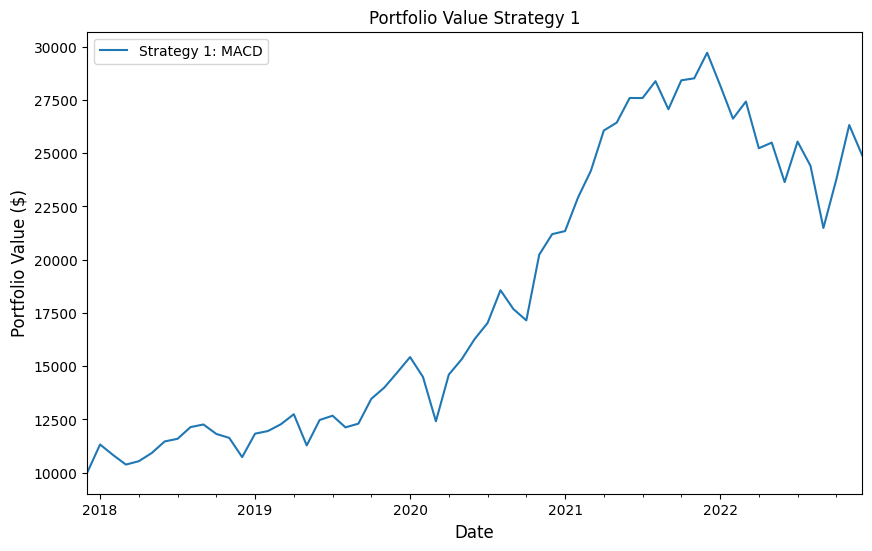

['BKNG', 'BLK', 'CHTR', 'CRM', 'DOW', 'INTC', 'META', 'NFLX', 'NKE', 'NVDA']


In [ ]:
#Put 10% of portfolio into each of the top 10 stocks and hold for a month

portfolio = 10000 #starting portfolio value $10000
portfolio_value = [portfolio] #starting portfolio value

#for assignment, last 60 months
for date in DataFrameDict['AAPL'].tail(60).index:
#for trading, most recent month
#for date in DataFrameDict['AAPL'].tail(1).index:
  profit = 0
  max_returns = {}
  #for each month, determine top 10 return predictions
  for key in DataFrameDict:
    if date in DataFrameDict[key].index:
      max_returns[key] = DataFrameDict[key]['return_predic'][date]
      if len(max_returns) <= 10:
        continue
      else:
        del max_returns[min(max_returns, key=max_returns.get)]
    else:
      continue

  #if API trading, create list of top 10 stocks to be traded
  #hashtag block if not trading
  # top_10 = []
  # for stock in max_returns:
  #   top_10.append(stock)
  # print("Most recent top 10 stocks:",top_10)
  # print("Skip to trading block")

  #if trading, hashtag everything up to trading section
  #for assignment, total investment changes each month
  investment = portfolio_value[-1]

  top_10 = []
  for stock in max_returns:
    top_10.append(stock)
    return_rate = DataFrameDict[stock]["ret"][date]
    profit += 0.1*investment*(1+return_rate)
  portfolio = profit
  #new portfolio value is the amount accrued during the holding period
  portfolio_value.append(portfolio)

#plot first strategy's portfolio value
from matplotlib import pyplot as plt

strategy = pd.DataFrame() #empty dataframe to store portfolio 1 value
strategy.index = DataFrameDict['AAPL'].tail(61).index #match index to dates
strategy['Strategy 1: MACD'] = portfolio_value

for portfolio in strategy:
  ax = strategy[portfolio].plot(label=portfolio,figsize=(10, 6))
  ax.set_xlabel('Date', fontsize=12)
  ax.set_ylabel('Portfolio Value ($)', fontsize=12)
  ax.legend()
  plt.title("Portfolio Value Strategy 1")
plt.show()

7. Find the mean, standard deviation, maximum drawdown, and Sharpe ratio of the portfolio created based on your strategy.

In [ ]:
#calculate summary statistics for the first strategy
import statistics
MACD_returns = []

for i in range(len(portfolio_value)-1):
  MACD_returns.append((portfolio_value[i]-portfolio_value[i-1])/portfolio_value[i-1])

average_return = statistics.mean(MACD_returns)

std_return = statistics.stdev(MACD_returns)

maximum_value = 0
current_value = 1
maximum_drawdown = 0
for i in MACD_returns:
  maximum_value = max(maximum_value,current_value)
  current_value = current_value*(1 + i)
  drawdown = -min(0,(current_value/maximum_value - 1))
  maximum_drawdown = max(maximum_drawdown,drawdown)

#risk free rates are the same for all stocks
risk_free = DataFrameDict['AAPL']['RF'].tail(60)
MACD_excess_returns = []
for i in range(len(MACD_returns)):
  MACD_excess_returns.append(MACD_returns[i]-risk_free[i])

avg_monthly_excess_return = statistics.mean(MACD_excess_returns)
sharpe_ratio = avg_monthly_excess_return/std_return

# Print performance metrics
print("Mean return: {:.2%}".format(average_return))
print("Standard deviation: {:.2%}".format(std_return))
print("Maximum drawdown: {:.2%}".format(maximum_drawdown))
print("Sharpe ratio: {:.2f}".format(sharpe_ratio))

Mean return: 0.85%
Standard deviation: 10.43%
Maximum drawdown: 59.84%
Sharpe ratio: -0.85


8. Compare these statistics to a benchmark strategy that always puts 1% (0.2% if you use S&P 500) in each of the stocks.

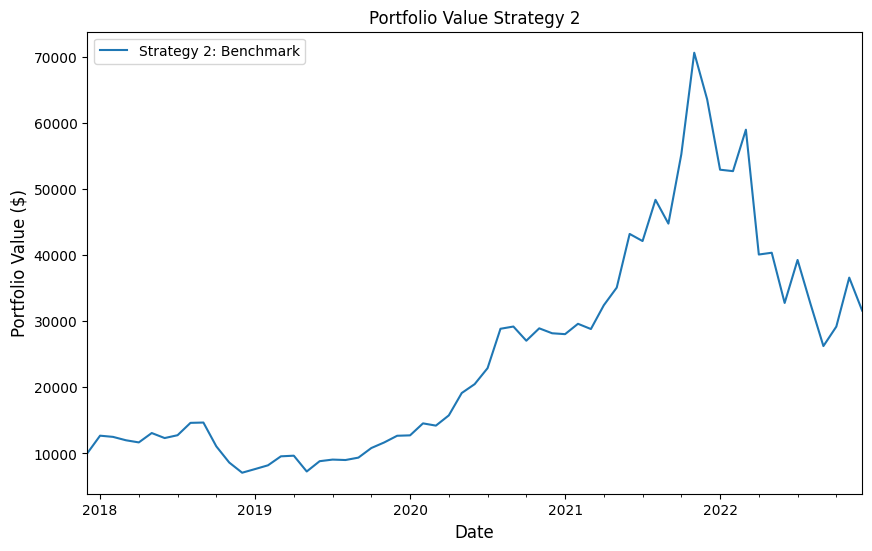

In [ ]:
#buy all 100 stocks and hold for a month
portfolio = 10000 #starting portfolio value $10000
portfolio_value = [portfolio] #starting portfolio value

for date in DataFrameDict['AAPL'].tail(60).index:
  profit = 0
  max_returns = {}
  investment = portfolio_value[-1]

  for key in DataFrameDict:
    if date in DataFrameDict[key].index:
      return_rate = DataFrameDict[stock]["ret"][date]
    else:
      #if stock didn't exist, invest risk free
      return_rate = DataFrameDict["AAPL"]["RF"][date]
    profit += 0.01*investment*(1+return_rate)

  portfolio = profit
  portfolio_value.append(portfolio)

strategy['Strategy 2: Benchmark'] = portfolio_value

for portfolio in strategy.iloc[:,-1:]:
  ax = strategy[portfolio].plot(label=portfolio,figsize=(10, 6))
  ax.set_xlabel('Date', fontsize=12)
  ax.set_ylabel('Portfolio Value ($)', fontsize=12)
  ax.legend()
  plt.title("Portfolio Value Strategy 2")
plt.show()

In [ ]:
#Calculate summary statistics for benchmark strategy
import statistics
BENCHMARK_returns = []

for i in range(len(portfolio_value)-1):
  BENCHMARK_returns.append((portfolio_value[i]-portfolio_value[i-1])/portfolio_value[i-1])

average_return = statistics.mean(BENCHMARK_returns)

std_return = statistics.stdev(BENCHMARK_returns)

maximum_value = 0
current_value = 1
maximum_drawdown = 0
for i in BENCHMARK_returns:
  maximum_value = max(maximum_value,current_value)
  current_value = current_value*(1 + i)
  drawdown = -min(0,(current_value/maximum_value - 1))
  maximum_drawdown = max(maximum_drawdown,drawdown)

risk_free = DataFrameDict['AAPL']['RF'].tail(60)
BENCHMARK_excess_returns = []
for i in range(len(BENCHMARK_returns)):
  BENCHMARK_excess_returns.append(BENCHMARK_returns[i]-risk_free[i])

avg_monthly_excess_return = statistics.mean(BENCHMARK_excess_returns)
sharpe_ratio = avg_monthly_excess_return/std_return

# Print performance metrics
print("Mean return: {:.2%}".format(average_return))
print("Standard deviation: {:.2%}".format(std_return))
print("Maximum drawdown: {:.2%}".format(maximum_drawdown))
print("Sharpe ratio: {:.2f}".format(sharpe_ratio))

Mean return: 2.05%
Standard deviation: 16.84%
Maximum drawdown: 77.57%
Sharpe ratio: -0.46


9. Plot a figure that shows the cumulative performance of both strategies.

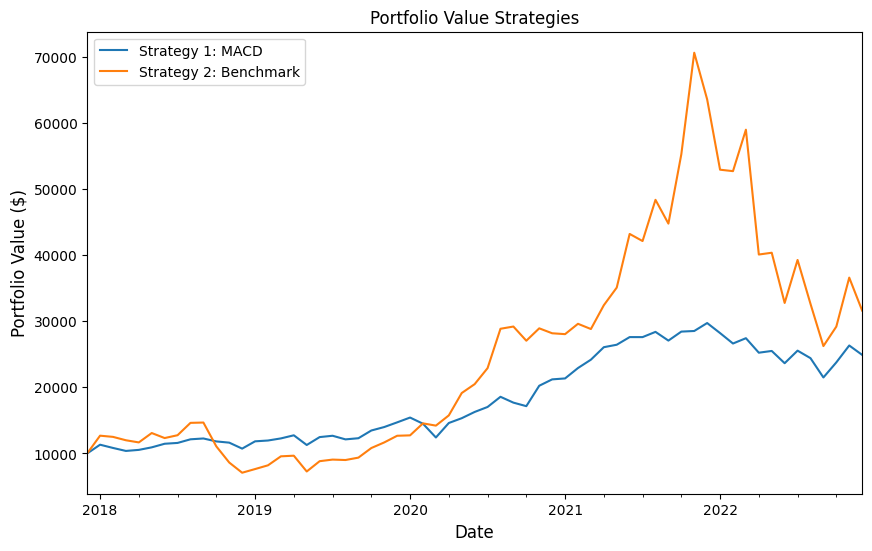

In [ ]:
#plot overlapping portfolios
for portfolio in strategy:
  ax = strategy[portfolio].plot(label=portfolio,figsize=(10, 6))
  ax.set_xlabel('Date', fontsize=12)
  ax.set_ylabel('Portfolio Value ($)', fontsize=12)
  ax.legend()
  plt.title("Portfolio Value Strategies")
plt.show()

Step-3: Write a code to trade automatically based on the strategy that you created in step 2.


In [ ]:
import ibapi
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
import threading
import time

class IBapi(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)

def run_loop():
    app.run()
app = IBapi()
app.connect('127.0.0.1', 7497, 123)
#Start the socket in a thread
api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()
time.sleep(1) #Sleep interval to allow time for connection to server

#Create contract object
for stock_ID in top_10:
    stock_contract = Contract()
    stock_contract.symbol = stock_ID
    stock_contract.secType = 'STK'
    stock_contract.exchange = 'SMART'
    stock_contract.currency = 'USD'

    time.sleep(20) #Sleep interval to allow time for incoming data
    app.disconnect()

    from ibapi.order import *

    class IBapi(EWrapper, EClient):
        def __init__(self):
            EClient.__init__(self, self)

        def nextValidId(self, orderId: int):
            super().nextValidId(orderId)
            self.nextorderId = orderId
            print('The next valid order id is: ', self.nextorderId)

        def orderStatus(self, orderId, status, filled, remaining, avgFullPrice, permId, parentId, lastFillPrice, clientId, whyHeld, mktCapPrice):
            print('orderStatus - orderid:', orderId, 'status:', status, 'filled', filled, 'remaining', remaining, 'lastFillPrice', lastFillPrice)

        def openOrder(self, orderId, contract, order, orderState):
            print('openOrder id:', orderId, contract.symbol, contract.secType, '@', contract.exchange, ':', order.action, order.orderType, order.totalQuantity, orderState.status)
        def execDetails(self, reqId, contract, execution):
            print('Order Executed: ', reqId, contract.symbol, contract.secType, contract.currency, execution.execId, execution.orderId, execution.shares, execution.lastLiquidity)

    def run_loop():
        app.run()

    # Function to create stock Order contract
    def stock_order(symbol):
        contract = Contract()
        contract.symbol = symbol
        contract.secType = 'STK'
        contract.exchange = 'SMART'
        contract.currency = 'USD'
        return contract

    app = IBapi()
    app.connect('127.0.0.1', 7497, 123)

    app.nextorderId = None

    # Start the socket in a thread
    api_thread = threading.Thread(target=run_loop, daemon=True)
    api_thread.start()

    # Check if the API is connected via orderid
    while True:
        if isinstance(app.nextorderId, int):
            print('connected')
            break
        else:
            print('waiting for connection')
            time.sleep(1)

    # Create order object
    order = Order()
    order.action = 'BUY'
    print("Since",stock_ID,"had one of the top 10 predicted returns of S&P 100, BUY.")

    order.totalQuantity = 1
    order.orderType = 'MKT'
    order.lmtPrice = '210'
    order.eTradeOnly = False
    order.firmQuoteOnly = False
    order.account = 'DU6587472'

    # Place order
    app.placeOrder(app.nextorderId, stock_order(stock_ID), order)
    app.nextorderId += 1

    time.sleep(3)

    # Cancel order
    def error(self, reqId, errorCode, errorString):
        if errorCode == 202:
            print('order canceled')

time.sleep(3)
app.disconnect()